<a href="https://colab.research.google.com/github/issacridhin/Speech_Processing/blob/main/2348546_Lab6_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Time Warping (DTW)

a) Plot both vectors to visualize their patterns

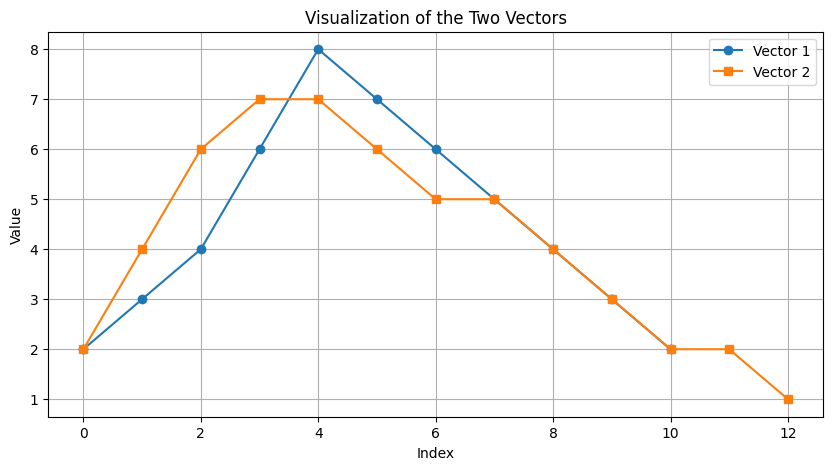

In [1]:
import matplotlib.pyplot as plt

# Given vectors
vector1 = [2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]
vector2 = [2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]

# Plotting the vectors
plt.figure(figsize=(10, 5))
plt.plot(vector1, label="Vector 1", marker='o')
plt.plot(vector2, label="Vector 2", marker='s')
plt.title("Visualization of the Two Vectors")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


Inference:

Vector 1 has a shorter length compared to Vector 2, which appears stretched and slightly shifted.

The visualization highlights their overall similarity in shape despite the stretching.

b) Implement the Dynamic Time Warping (DTW) algorithm

In [2]:
import numpy as np

def dtw(vector1, vector2):
    n, m = len(vector1), len(vector2)
    dtw_matrix = np.full((n + 1, m + 1), float('inf'))
    dtw_matrix[0, 0] = 0  # Starting point

    # Populate the DTW matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(vector1[i - 1] - vector2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j],    # Insertion
                                          dtw_matrix[i, j - 1],    # Deletion
                                          dtw_matrix[i - 1, j - 1])  # Match

    return dtw_matrix

# Compute the DTW matrix
dtw_matrix = dtw(vector1, vector2)


c) Compute the accumulated cost matrix

In [3]:
print("Accumulated Cost Matrix:")
print(dtw_matrix[1:, 1:])  # Remove the infinity padding for clarity


Accumulated Cost Matrix:
[[ 0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [ 1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [ 3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [ 7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [27. 13.  7.  8.  8.  5.  3.  3.  2.  3.  5.  7. 10.]
 [28. 14. 10. 11. 12.  8.  5.  5.  3.  2.  3.  4.  6.]
 [28. 16. 14. 15. 16. 12.  8.  8.  5.  3.  2.  2.  3.]]


Inference:

The accumulated cost matrix shows the minimum cost required to align each element of Vector 1 to elements in Vector 2.

The smaller the cost, the more similar the corresponding elements.

d) Find and visualize the warping path

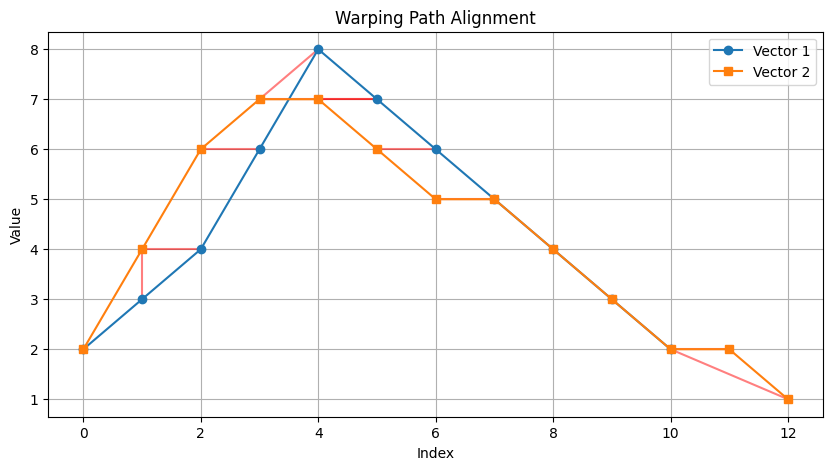

In [4]:
def extract_warping_path(dtw_matrix):
    i, j = len(vector1), len(vector2)
    path = []

    # Traceback to find the optimal path
    while i > 0 and j > 0:
        path.append((i - 1, j - 1))
        # Choose the minimum cost direction
        if dtw_matrix[i - 1, j] == min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1]):
            i -= 1
        elif dtw_matrix[i, j - 1] == min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1]):
            j -= 1
        else:
            i -= 1
            j -= 1
    path.reverse()  # Reverse the path to start from the beginning
    return path

# Extract warping path
warping_path = extract_warping_path(dtw_matrix)

# Visualize warping path
plt.figure(figsize=(10, 5))
for (i, j) in warping_path:
    plt.plot([i, j], [vector1[i], vector2[j]], 'r-', alpha=0.5)
plt.plot(range(len(vector1)), vector1, label="Vector 1", marker='o')
plt.plot(range(len(vector2)), vector2, label="Vector 2", marker='s')
plt.title("Warping Path Alignment")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


Inference:

The warping path demonstrates how elements of Vector 1 align with Vector 2, accounting for stretching and shifting.

Lines connecting indices represent the alignment

e) Calculate the DTW distance

In [5]:
# DTW distance is the final element in the accumulated cost matrix
dtw_distance = dtw_matrix[len(vector1), len(vector2)]
print(f"DTW Distance: {dtw_distance}")


DTW Distance: 3.0


Inference:

The DTW distance quantifies the dissimilarity between the two vectors after optimal alignment.

A smaller DTW distance indicates higher similarity.

The warping path shows how each point in Vector 1 maps to a corresponding point in Vector 2, effectively aligning them despite stretching and shifts.

The DTW distance provides a numerical measure of similarity; a lower distance implies that the vectors are closely related in shape, confirming their overall alignment.